Chapter 2: XGBoost for Regression Predictive Modeling and Time Series Analysis

In [2]:
# p168 Machine Learning for Tabular Data
# pip install XGBoost

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

In [4]:
# Ingest the iris dataset
irisarray = datasets.load_iris()

In [5]:
print(irisarray)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
irisdata = pd.DataFrame(
    data=np.c_[irisarray["data"], irisarray["target"]],
    columns=irisarray["feature_names"] + ["Species"],
)


In [7]:
print(irisdata.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


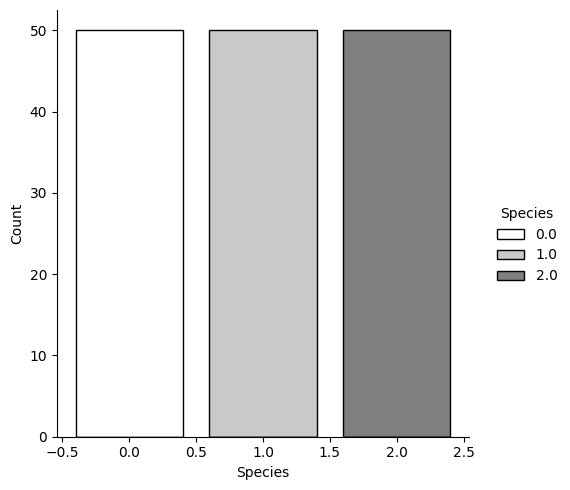

In [8]:
sns.displot(
    irisdata, x="Species", discrete=True, hue="Species", shrink=0.8, palette="Greys"
)

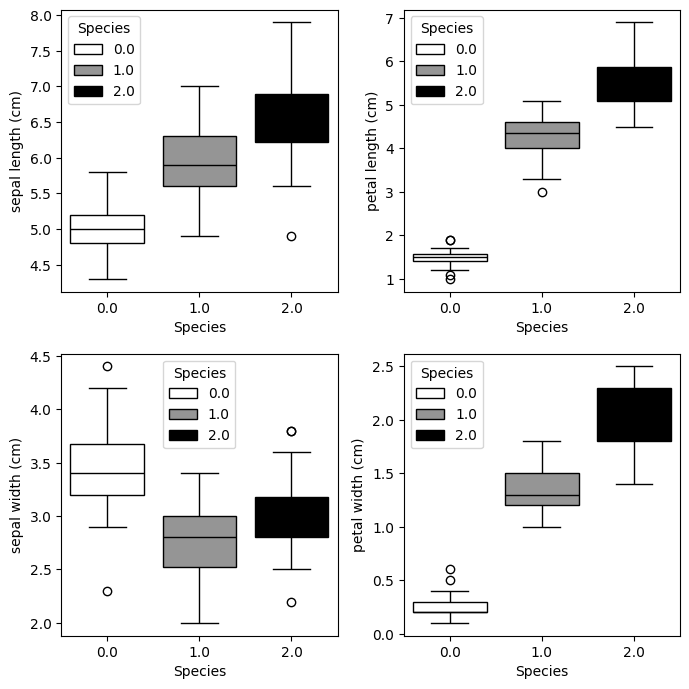

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.boxplot(
    ax=axes[0, 0],
    data=irisdata,
    x="Species",
    y="sepal length (cm)",
    palette="Greys",
    hue="Species",
)
sns.boxplot(
    ax=axes[0, 1],
    data=irisdata,
    x="Species",
    y="petal length (cm)",
    palette="Greys",
    hue="Species",
)
sns.boxplot(
    ax=axes[1, 0],
    data=irisdata,
    x="Species",
    y="sepal width (cm)",
    palette="Greys",
    hue="Species",
)
sns.boxplot(
    ax=axes[1, 1],
    data=irisdata,
    x="Species",
    y="petal width (cm)",
    palette="Greys",
    hue="Species",
)
plt.tight_layout()
plt.show()

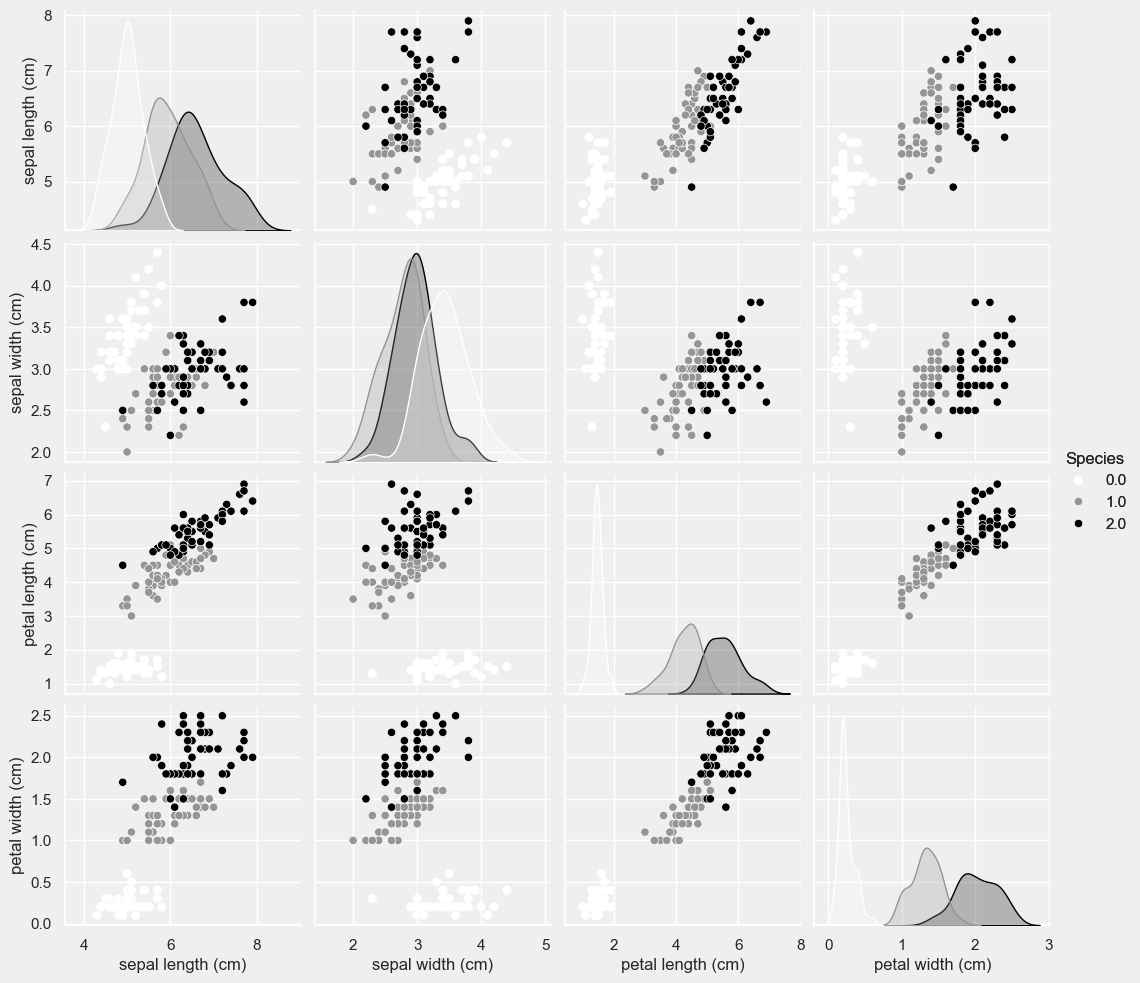

In [ ]:
# x-y plots
sns.set_theme(rc={"axes.facecolor": "efefef", "figure.facecolor": "efefef"})
graphxy = sns.pairplot(
    irisdata,
    hue="Species",
    palette="Greys",
)
graphxy.add_legend()

In [12]:
# split data into train and test sets
training_data, testing_data = train_test_split(irisdata, test_size=0.2, random_state=17)

In [13]:
training_data.shape

(120, 5)

In [ ]:
# set the input values for the training dataset
X_train = training_data[
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
]
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
29,4.7,3.2,1.6,0.2
98,5.1,2.5,3.0,1.1
37,4.9,3.6,1.4,0.1
5,5.4,3.9,1.7,0.4
81,5.5,2.4,3.7,1.0


In [ ]:
# set the output to the Species column
y_train = training_data[["Species"]]
y_train.head()

,Species
29,0.0
98,1.0
37,0.0
5,0.0
81,1.0


In [ ]:
# set up the input (X) and output (y) for the test dataset
X_test = testing_data[
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
]
y_test = testing_data[["Species"]]

In [ ]:
# train the XGBoost model
iris_classifier = xgb.XGBClassifier(eval_metric="auc")
iris_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])

[0]	validation_0-auc:1.00000	validation_1-auc:0.99898
[1]	validation_0-auc:1.00000	validation_1-auc:0.99836
[2]	validation_0-auc:1.00000	validation_1-auc:0.99877
[3]	validation_0-auc:1.00000	validation_1-auc:0.99887
[4]	validation_0-auc:1.00000	validation_1-auc:0.99939
[5]	validation_0-auc:1.00000	validation_1-auc:0.99949
[6]	validation_0-auc:1.00000	validation_1-auc:0.99959
[7]	validation_0-auc:1.00000	validation_1-auc:0.99980
[8]	validation_0-auc:1.00000	validation_1-auc:0.99980
[9]	validation_0-auc:1.00000	validation_1-auc:1.00000
[10]	validation_0-auc:1.00000	validation_1-auc:1.00000
[11]	validation_0-auc:1.00000	validation_1-auc:1.00000
[12]	validation_0-auc:1.00000	validation_1-auc:1.00000
[13]	validation_0-auc:1.00000	validation_1-auc:1.00000
[14]	validation_0-auc:1.00000	validation_1-auc:1.00000
[15]	validation_0-auc:1.00000	validation_1-auc:1.00000
[16]	validation_0-auc:1.00000	validation_1-auc:1.00000
[17]	validation_0-auc:1.00000	validation_1-auc:1.00000
[18]	validation_0-au

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [19]:
# make predictions
y_score = iris_classifier.predict(X_test)

In [20]:
# make prediction based on example measurements
X_example = np.array([4.5, 3.0, 1.5, 0.25])
X_example = X_example.reshape(1, 4)
y_example = iris_classifier.predict(X_example)
print(y_example)

[0]


In [21]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
conf = confusion_matrix(y_test, y_score)
print("Confusion matrix \n", conf)

Confusion matrix 
 [[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


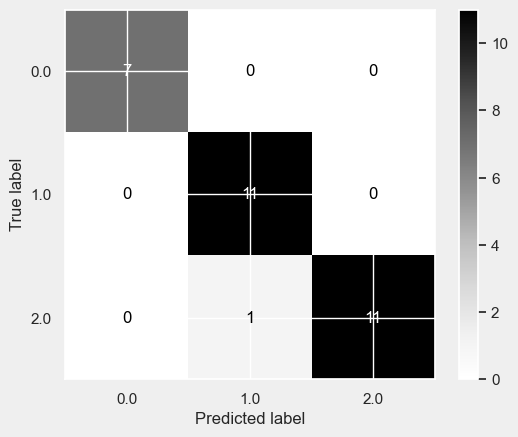

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_score, cmap="Greys")